# Lab 5 - Introduction to Numeric Methods for ODEs
## BIOS 26210 (fall 2022)
### solutions

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Part 1: Forward Euler implementation

The ODE model of membrane potential with only one ionic species and no applied current has the following form:

$$ \frac{dV}{dt} = \frac{g}{C} (V_R -V) $$

Where $C$ is the membrane capacitance, $g$ is the conductance of ion channels, and $V_R$ is the reversal (Nernst) potential of the specific ionic species. Let $C = 0.05$, $g=0.02$ and $V_R = 60$ (in mV it is the reversal potential of Na+ ions). 

### 1.1 Numeric solutions using FE

Implement the Forward Euler method for this ODE inside a function that has the following inputs and outputs:

* INPUTS: C, g, VR, V0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), V (vector array)

Self-check: using the above given parameters with $dt = 0.1$, $V_0 = 100$ and $Tmax = 5$, the final value of $V$ should be close to 65.412.


In [2]:
C = 0.05
g = 0.02
VR = 60
dt = 0.1 #set the time step
V0 = 100
Tmax = 5

def cole_fefunc(C,g,VR,V0,dt,Tmax):
    Niter = int(np.ceil(Tmax/dt))
    t = np.linspace(0,Tmax,Niter) # preallocate the time array
    V = np.zeros(Niter)
    V[0] = V0  #set the initial value
    for i in np.arange(Niter-1): # Do the Euler!
        V[i+1] = V[i] + dt*((g/C)*(VR-V[i]))
    return V, t

print(cole_fefunc(C, g, VR, V0, dt, Tmax))

(array([100.        ,  98.4       ,  96.864     ,  95.38944   ,
        93.9738624 ,  92.6149079 ,  91.31031159,  90.05789912,
        88.85558316,  87.70135983,  86.59330544,  85.52957322,
        84.50839029,  83.52805468,  82.58693249,  81.68345519,
        80.81611699,  79.98347231,  79.18413341,  78.41676808,
        77.68009736,  76.97289346,  76.29397772,  75.64221861,
        75.01652987,  74.41586867,  73.83923393,  73.28566457,
        72.75423799,  72.24406847,  71.75430573,  71.2841335 ,
        70.83276816,  70.39945743,  69.98347914,  69.58413997,
        69.20077437,  68.8327434 ,  68.47943366,  68.14025631,
        67.81464606,  67.50206022,  67.20197781,  66.9138987 ,
        66.63734275,  66.37184904,  66.11697508,  65.87229608,
        65.63740423,  65.41190806]), array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
     

### 1.2 Plot of solutions

Produce a plot of multiple solutions starting with different initial values $V_0$ to illustrate the dynamics of solutions. Choose a good time step and maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

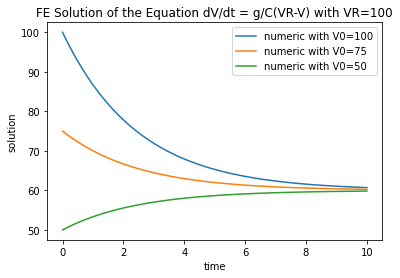

In [3]:
dt = 0.1 #set the time step
V0 = 100
Tmax = 10
# Niter = int(np.ceil(Tmax/dt))
# t = np.linspace(0,Tmax,Niter) # preallocate the time array
# V = np.zeros(Niter)

V = cole_fefunc(C, g, VR, V0, dt, Tmax)[0]
t = cole_fefunc(C, g, VR, V0, dt, Tmax)[1]

plt.plot(t,V, label='numeric with V0='+str(V0))
plt.xlabel('time')  
plt.ylabel('solution')
plt.title("FE Solution of the Equation dV/dt = g/C(VR-V) with VR="+str(V0))

V0 = 75
V = cole_fefunc(C, g, VR, V0, dt, Tmax)[0]

plt.plot(t,V, label='numeric with V0='+str(V0))

V0 = 50
V = cole_fefunc(C, g, VR, V0, dt, Tmax)[0]

plt.plot(t,V, label='numeric with V0='+str(V0))

plt.legend()
plt.show()

### 1.3 FE for the logistic ODE

The logistic model of population is described by the following ODE:

$$ \frac{dP}{dt} = r(1-\frac{P}{K}) P $$

where $P$ is population size, $t$ is time, and the parameters $r$ and $K$ represent the instinsic growth rate and carrying capacity, respectively.

Implement the Forward Euler method for the logistic ODE inside a function that has the following inputs and outputs:

* INPUTS: r, K, P0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), P (vector array)

Self-check: using the above given parameters with  $K=5000$ and $r=0.1$, $dt = 1$, $P_0 = 10$ and $Tmax = 5$, the final value of $P$ should be close to 14.629. 

In [4]:
r = 0.1
K = 5000
P0 = 10
dt = 1 #set the time step
Tmax = 5

def logfefunc(r,K,P0,dt,Tmax):
    Niter = int(np.ceil(Tmax/dt))
    t = np.linspace(0,Tmax,Niter)
    P = np.zeros(Niter)
    P[0] = P0  #set the initial value
    for i in np.arange(Niter-1): # Do the Euler!
        P[i+1] = P[i] + dt*r*(1-(P[i]/K))*P[i]
    return P, t

print(logfefunc(r, K, P0, dt, Tmax))

(array([10.        , 10.998     , 12.09538088, 13.301993  , 14.62865344]), array([0.  , 1.25, 2.5 , 3.75, 5.  ]))


### 1.4 plotting the solutions

Produce a plot of multiple solutions using the forward Euler function, starting with different initial values $P_0$ to illustrate the dynamics of solutions. Choose a time step dt that results in smooth solution curve and sufficient maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

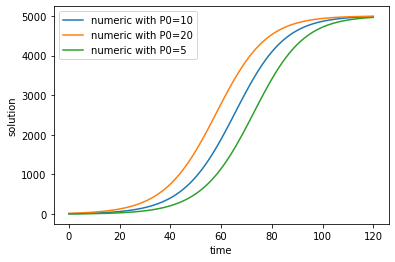

In [5]:
dt = 1 #set the time step
Tmax = 120
P0 = 10

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with P0='+str(P0))
plt.xlabel('time')  
plt.ylabel('solution')

P0 = 20

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with P0='+str(P0))

P0 = 5

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with P0='+str(P0))

plt.legend()
plt.show()

## Part 2: Backward Euler implementation

### 2.1 BE for Cole ODE

Implement the Backward Euler method for the same Cole membrane ODE in a similar function as in part 1, with the following requirements:

* INPUTS: C, g, VR, V0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), V (vector array)

Self-check: using the above given parameters with $dt = 0.1$, $V_0 = 100$ and $Tmax = 5$, the final value of $V$ should be close to 65.853.

In [6]:
C = 0.05
g = 0.02
VR = 60
dt = 0.1 #set the time step
Tmax = 5
V0 = 100

def cole_befunc(C,g,VR,V0,dt,Tmax):
    Niter = int(np.ceil(Tmax/dt))
    t = np.linspace(0,Tmax,Niter) # preallocate the time array
    V = np.zeros(Niter)
    V[0] = V0  #set the initial value
    for i in np.arange(Niter-1): # Do the Euler!
        V[i+1] = (V[i]+(dt*(g/C)*VR))/(1+dt*(g/C))
    return V, t

print(cole_befunc(C, g, VR, V0, dt, Tmax))


(array([100.        ,  98.46153846,  96.98224852,  95.55985435,
        94.19216764,  92.87708427,  91.61258103,  90.39671253,
        89.2276082 ,  88.10346942,  87.02256675,  85.98323726,
        84.98388198,  84.02296345,  83.09900331,  82.21058011,
        81.35632703,  80.53492983,  79.74512484,  78.98569696,
        78.25547785,  77.55334408,  76.87821547,  76.22905333,
        75.60485897,  75.00467209,  74.42756932,  73.87266281,
        73.33909885,  72.82605659,  72.33274672,  71.85841031,
        71.4023176 ,  70.96376693,  70.54208358,  70.13661883,
        69.74674887,  69.37187392,  69.01141723,  68.66482426,
        68.33156179,  68.0111171 ,  67.70299721,  67.40672809,
        67.12185393,  66.84793647,  66.5845543 ,  66.33130221,
        66.08779059,  65.8536448 ]), array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
     

### 2.2 Plotting the solutions

Produce a plot of multiple solutions using the Backward Euler function for the Cole model using the same parameter values, starting with different initial values $V_0$ to illustrate the dynamics of solutions. Choose a time step so that solutions are smooth and sufficient maximum time to illustrate convergence of all solutions. Add an informative legend and title to the plot.

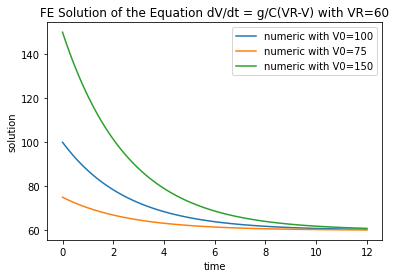

In [7]:
dt = 0.1 #set the time step
V0 = 100
Tmax = 12

plt.plot(cole_befunc(C, g, VR, V0, dt, Tmax)[1],cole_befunc(C, g, VR, V0, dt, Tmax)[0], label='numeric with V0='+str(V0))
plt.xlabel('time')  
plt.ylabel('solution')
plt.title("FE Solution of the Equation dV/dt = g/C(VR-V) with VR="+str(VR))

V0 = 75

plt.plot(cole_befunc(C, g, VR, V0, dt, Tmax)[1],cole_befunc(C, g, VR, V0, dt, Tmax)[0], label='numeric with V0='+str(V0))

V0 = 150

plt.plot(cole_befunc(C, g, VR, V0, dt, Tmax)[1],cole_befunc(C, g, VR, V0, dt, Tmax)[0], label='numeric with V0='+str(V0))

plt.legend()
plt.show()

### 2.3 BE for the logistic ODE

Implement the Backward Euler method for the logistic ODE inside a function that has the following inputs and outputs:

* INPUTS: r, K, P0 (initial value), dt (time step), Tmax (time duration)
* OUTPUTS: time (vector array), P (vector array)

Self-check: using the above given parameters with  $K=5000$ and $r=0.1$, $dt = 1$, $P_0 = 10$ and $Tmax = 5$, the final value of $P$ should be close to 15.224. 

In [8]:
r = 0.1
k = 5000
P0 = 10
dt = 1 #set the time step
Tmax = 5

def logbefunc(r,K,P0,dt,Tmax):
    Niter = int(np.ceil(Tmax/dt))
    t = np.linspace(0,Tmax,Niter)
    P = np.zeros(Niter)
    P[0] = P0  #set the initial value
    for i in np.arange(Niter-1): # Do the Euler!
        P[i+1] = (-(1-dt*r)+np.sqrt((1-dt*r)**2+4*P[i]*(r*dt)/k))/(2*dt*r/k)
    return P, t

print(logbefunc(r, K, P0, dt, Tmax))

(array([10.        , 11.10836898, 12.33924871, 13.70610174, 15.22385159]), array([0.  , 1.25, 2.5 , 3.75, 5.  ]))


### 2.4 plotting the solutions

Produce a plot of multiple solutions of the logistic model using the Backward Euler function, using the same parameters and starting with different initial values $P_0$ to illustrate the dynamics of solutions. Choose a time step dt that results in smooth solution curve and sufficient maximum time to illustrate the convergence of all solutions. Add an informative legend and title to the plot.

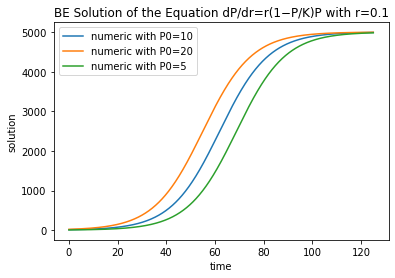

In [9]:
dt = 0.1 #set the time step
Tmax = 125
P0 = 10

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.title("BE Solution of the Equation dP/dr=r(1−P/K)P with r="+str(r))
plt.plot(t,P, label='numeric with P0='+str(P0))
plt.xlabel('time')  
plt.ylabel('solution')

P0 = 20

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with P0='+str(P0))

P0 = 5

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with P0='+str(P0))

plt.legend()
plt.show()

# Talked to Ethan about the graph in office hours 11/14/2022, make sure to comment about it on Canvas resubmission

## Part 3 Exploration of error behavior

### 3.1 FE vs. BE for Cole membrane potential ODE

Use the analytic solution of the Cole model ODE derived in chapter 9 of the course text to calculate the error of the numeric solutions produced by both FE and BE methods. Specifically, calculate numeric solutions using FE for some range of time (e.g. from 0 to 10), calculate and assign the mean error over the entire solution array to an array of vectors, then plot that array as a function of time step. Do the same thing for numeric solutions using BE, assign the mean errors to an array, then plot that array as a function of time step on the same plot window. Comment on how FE and BE solutions depend on time step as time step approaches zero, and which one does a better job as time step gets large.

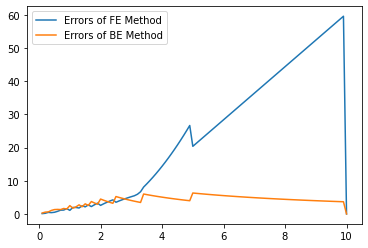

In [20]:
C = 0.05
g = 0.02
VR = 60
V0 = 100
dt = 0.1
Tmax = 10
# t, V = cole_fefunc(C,g,VR,V0,dt,Tmax)

tstep = 100 # number of time steps
dts = np.linspace(0.1, Tmax, tstep) # array of time steps
errors = np.zeros(tstep)
for i in np.arange(tstep):
    V, t = cole_fefunc(C, g, VR, V0, dts[i], Tmax)
    y = (V[0]-VR)*np.exp(-g/C*t)+VR
    errors[i] = np.mean(abs(V-y))
plt.plot(dts, errors, label='Errors of FE Method')

errors = np.zeros(tstep)
for i in np.arange(tstep):
    V, t = cole_befunc(C, g, VR, V0, dts[i], Tmax)
    y = (V[0]-VR)*np.exp(-g/C*t)+VR
    errors[i] = np.mean(abs(V-y))
plt.plot(dts, errors, label='Errors of BE Method')

plt.legend()
plt.show()

The BE equation does a much better job at remaining stable as the time step grets larger compared to the instability of the FE equation.

### 3.2 Growth of errors in solutions of logistic ODE

Let us examine how errors behave in the numeric solutions of the logistic ODE. Use your Forward Euler function for logistic model that you defined above and the same parameter values to calculate the solution and plot it over reasonable time range. Increase the timestep until you see solutions break down and behave very differently from the correct solution, plot the solutions for several time step values on the same plot to compare the behavior at a small time step value with that of a large value of dt. Report the dt value at which a dramatic change occurs. 

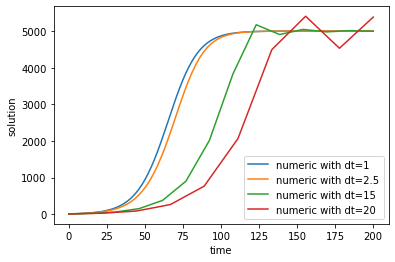

In [105]:
# def logfefunc(r,K,P0,dt,Tmax):
#     Niter = int(np.ceil(Tmax/dt))
#     t = np.linspace(0,Tmax,Niter)
#     P = np.zeros(Niter)
#     P[0] = P0  #set the initial value
#     for i in np.arange(Niter-1): # Do the Euler!
#         P[i+1] = P[i] + dt*r*(1-(P[i]/K))*P[i]
#     return P, t

# print(logfefunc(r, K, P0, dt, Tmax))

r = 0.1
K = 5000
P0 = 10
dt = 1 #set the time step
Tmax = 200
P0 = 10

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))
plt.xlabel('time')  
plt.ylabel('solution')

dt = 2.5 #set the time step

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))
plt.xlabel('time')  
plt.ylabel('solution')

dt = 15 #set the time step

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))
plt.xlabel('time')  
plt.ylabel('solution')

dt = 20 #set the time step

P = logfefunc(r,K,P0,dt,Tmax)[0]
t = logfefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))
plt.xlabel('time')  
plt.ylabel('solution')

plt.legend()
plt.show()

The value which starts affecting the graph is when dt = 15 


### 3.3
Use your Backward Euler function for logistic model that you defined above and the same parameter values to calculate the solution and plot it over reasonable time range. Choose the same time steps values you chose for Foward Euler above, and make the same plot of solutions for several different values of dt. How does Backward Euler behave at higher time steps?

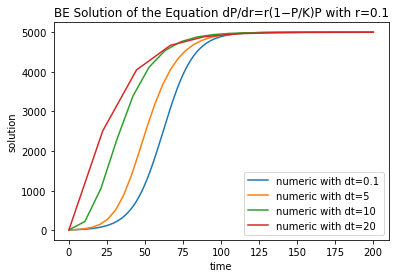

In [104]:
dt = 0.1 #set the time step
Tmax = 200
P0 = 10

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.title("BE Solution of the Equation dP/dr=r(1−P/K)P with r="+str(r))
plt.plot(t,P, label='numeric with dt='+str(dt))
plt.xlabel('time')  
plt.ylabel('solution')

dt = 5 #set the time step

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))

dt = 10 #set the time step

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))

dt = 20 #set the time step

P = logbefunc(r,K,P0,dt,Tmax)[0]
t = logbefunc(r,K,P0,dt,Tmax)[1]

plt.plot(t,P, label='numeric with dt='+str(dt))

plt.legend()
plt.show()

The smaller the time step, the closer the BE solution is to the correct solution. As the time step grows larger, the BE solutions grow more quickly, approaching the carrying capacity of 5000 much sooner than at small time steps. However, the solution begins to change less and less as time step grows (the solution at dt = 20 is still about the same as the solution at dt=5). This is incontrast to the FE solutions, which grow more and more broken as dt increases.